Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load

In [2]:
data1 = pd.read_csv("../files/edges/geolife.csv")
data2 = pd.read_csv("../files/edges/geolife_time_1min.csv")
data3 = pd.read_csv("../files/edges/geolife_time_30min.csv")
data4 = pd.read_csv("../files/edges/geolife_time_1day.csv")

data1_nodes = pd.read_csv("../files/nodes/geolife.csv")
max_node_number1 = data1_nodes["Person ID"].max()

data5 = pd.read_csv("../files/edges/tdrive.csv")
data6 = pd.read_csv("../files/edges/tdrive_time_1min.csv")
data7 = pd.read_csv("../files/edges/tdrive_time_30min.csv")
data8 = pd.read_csv("../files/edges/tdrive_time_1day.csv")

data5_nodes = pd.read_csv("../files/nodes/tdrive.csv")
max_node_number2 = data5_nodes["Taxi ID"].max()

Function

In [3]:
def analyze(edges_df, nodes_df, node_max, taxi1, taxi2, node, graph_label):
	if edges_df.empty:
		print("DataFrame is empty.")
		return
	merged_edges_df = pd.merge(nodes_df, edges_df, left_on=node, right_on=taxi1, how="left")
	merged_edges_df.fillna(0, inplace=True)

	all_numbers = pd.concat([edges_df[taxi1], edges_df[taxi2]])
	most_common_number = all_numbers.mode().iloc[0]
	max_occurrences = all_numbers.value_counts().max()

	occurrences_counts = all_numbers.value_counts().reindex(range(1, node_max + 1), fill_value=0)
	least_common_number = occurrences_counts.idxmin()
	min_occurrences = occurrences_counts.loc[least_common_number]

	nodes_occurrences_df = pd.DataFrame({'Node': all_numbers.value_counts().index, 'Occurrences': all_numbers.value_counts().values})

	unique_persons = set(edges_df[taxi1]).union(set(edges_df[taxi2]))

	num_edges = len(edges_df)
	num_nodes = len(unique_persons)

	# Average number of edges per node
	avg_edges_per_node = (num_edges / node_max) * 2
	avg_edges_per_active_node = (num_edges / num_nodes) * 2

	print(f"Number of edges: {num_edges}")
	print(f"Number of nodes: {node_max}")
	print(f"Number of nodes with edges: {num_nodes}")
	print(f"Max number of edges from a node: Node {most_common_number} with {max_occurrences} edges")
	print(f"Min number of edges from a node: Node {least_common_number} with {min_occurrences} edges")
	print(f"Average number of edges per node: {avg_edges_per_node:.2f}")
	print(f"Average number of edges per active node: {avg_edges_per_active_node:.2f}")

	plt.figure(figsize=(10, 6))
	plt.bar(nodes_occurrences_df["Node"], nodes_occurrences_df["Occurrences"])
	plt.title("Nodes and Their Occurrences for " + graph_label)
	plt.xlabel("Node number")
	plt.ylabel("Occurrences")
	plt.xscale('log')
	plt.show()

	plt.figure(figsize=(10, 6))
	plt.hist(nodes_occurrences_df["Occurrences"], bins=20, color='blue', edgecolor='black')
	plt.title("Distribution of Node Occurrences for " + graph_label)
	plt.xlabel("Number of edges")
	plt.ylabel("Number of Nodes having that many edges")
	plt.show()

Number of edges: 10522
Number of nodes: 181
Number of nodes with edges: 178
Max number of edges from a node: Node 128 with 176 edges
Min number of edges from a node: Node 118 with 0 edges
Average number of edges per node: 116.27
Average number of edges per active node: 118.22


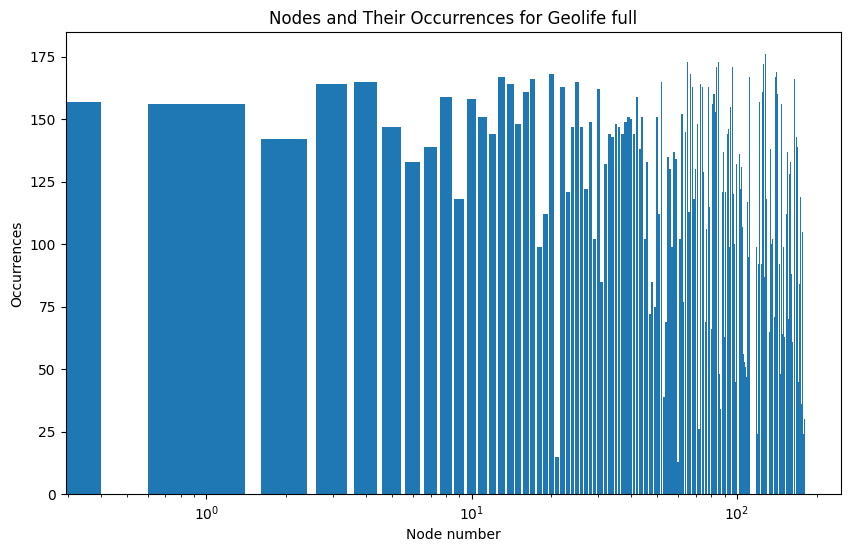

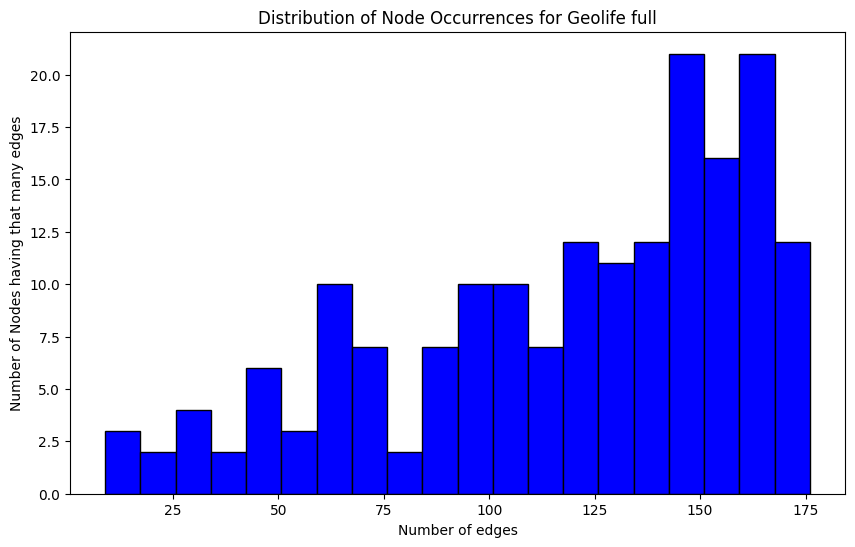

Number of edges: 6077
Number of nodes: 181
Number of nodes with edges: 176
Max number of edges from a node: Node 167 with 154 edges
Min number of edges from a node: Node 21 with 0 edges
Average number of edges per node: 67.15
Average number of edges per active node: 69.06


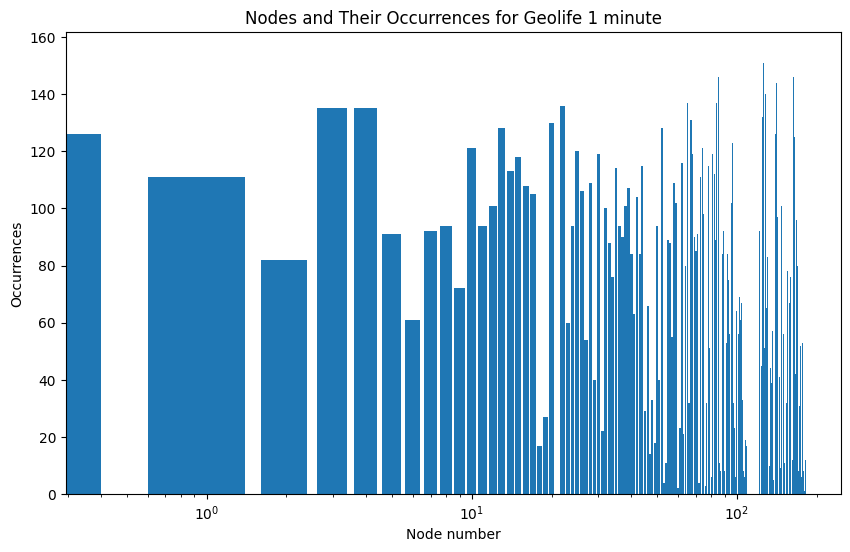

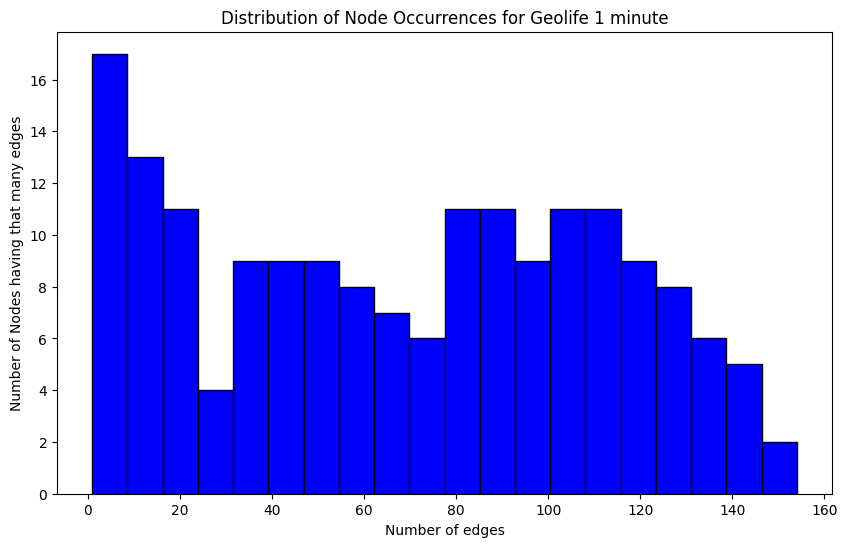

Number of edges: 6112
Number of nodes: 181
Number of nodes with edges: 176
Max number of edges from a node: Node 167 with 154 edges
Min number of edges from a node: Node 21 with 0 edges
Average number of edges per node: 67.54
Average number of edges per active node: 69.45


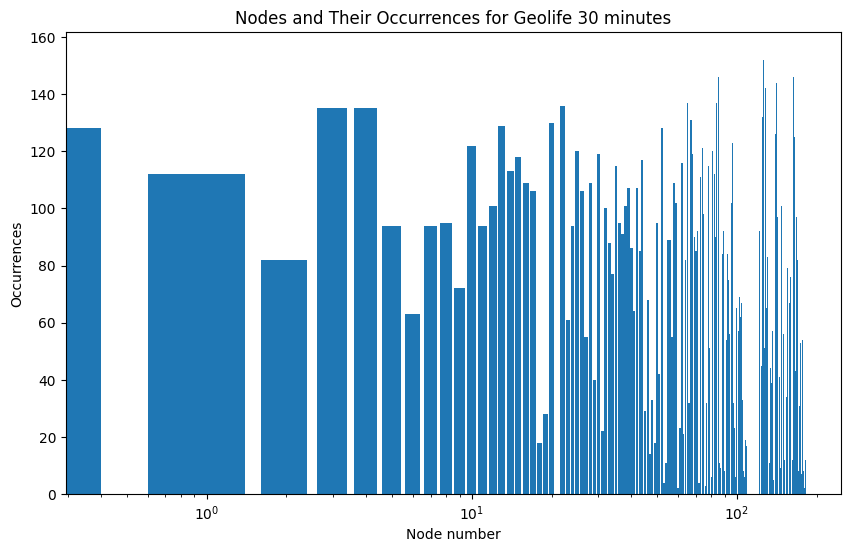

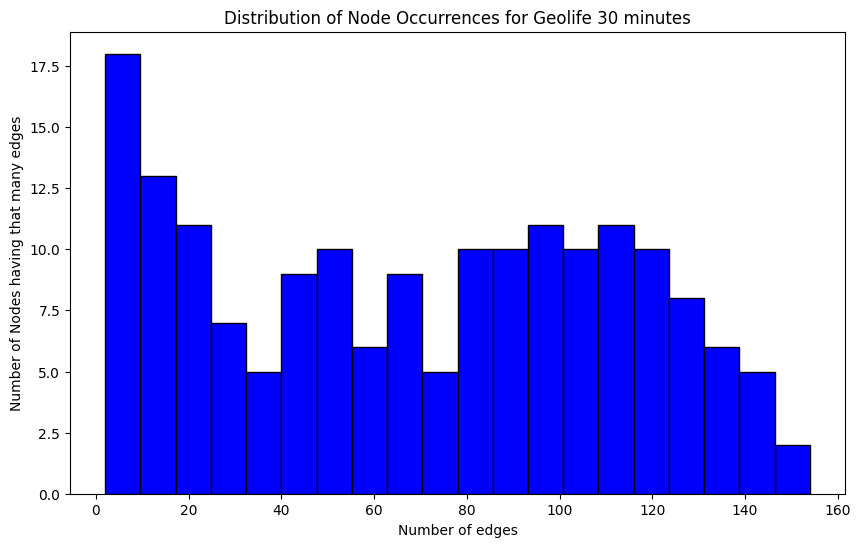

Number of edges: 6331
Number of nodes: 181
Number of nodes with edges: 176
Max number of edges from a node: Node 167 with 156 edges
Min number of edges from a node: Node 21 with 0 edges
Average number of edges per node: 69.96
Average number of edges per active node: 71.94


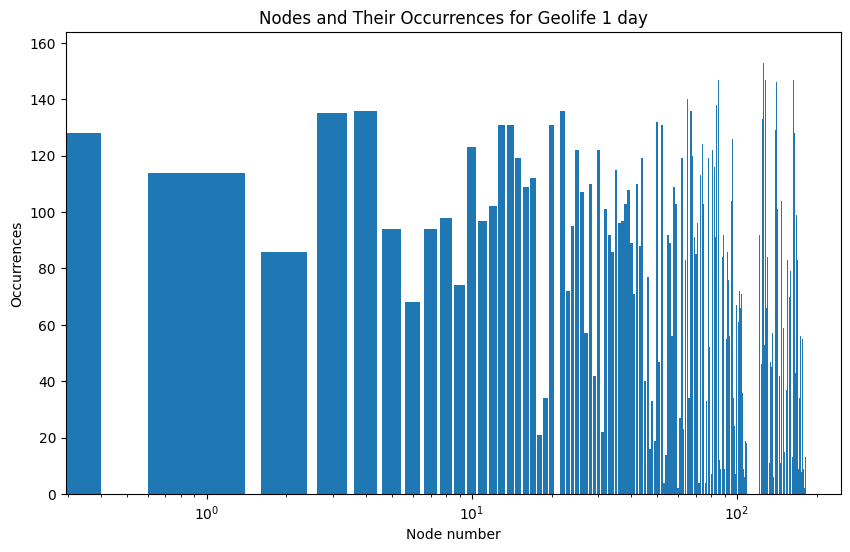

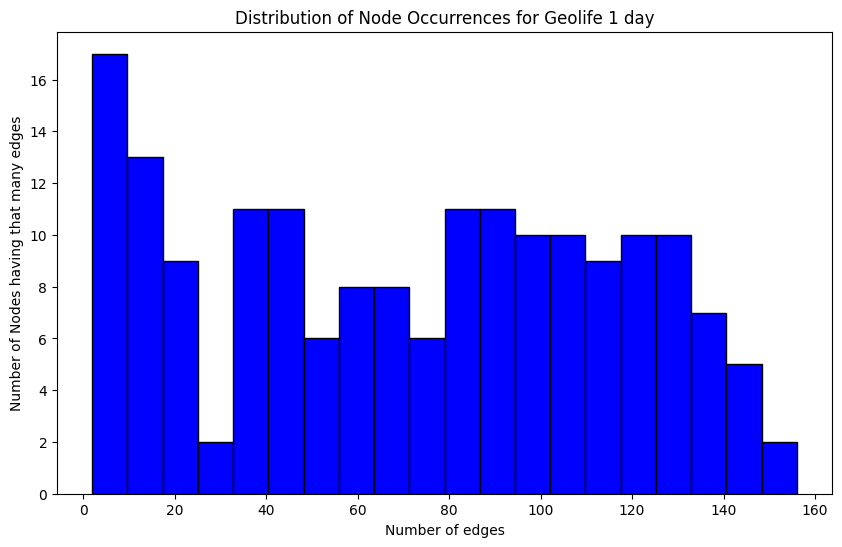

Number of edges: 1365005
Number of nodes: 10357
Number of nodes with edges: 9991
Max number of edges from a node: Node 6275 with 7420 edges
Min number of edges from a node: Node 8 with 0 edges
Average number of edges per node: 263.59
Average number of edges per active node: 273.25


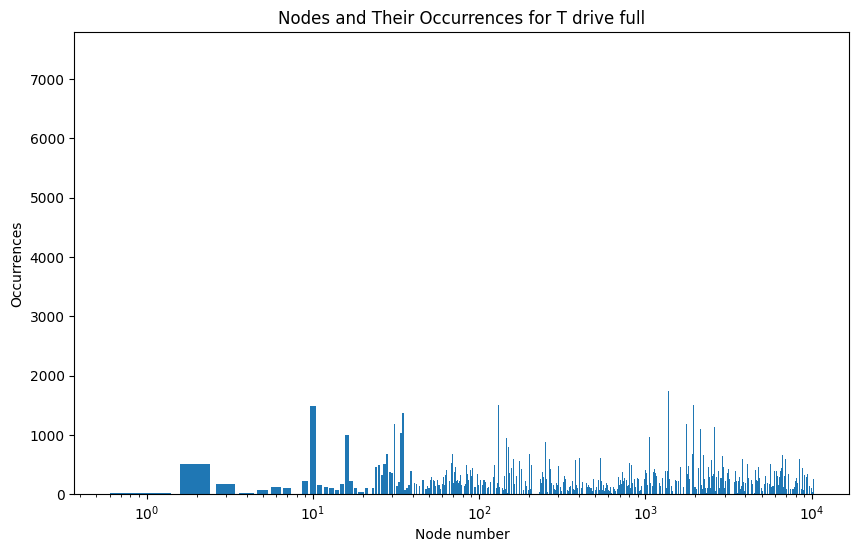

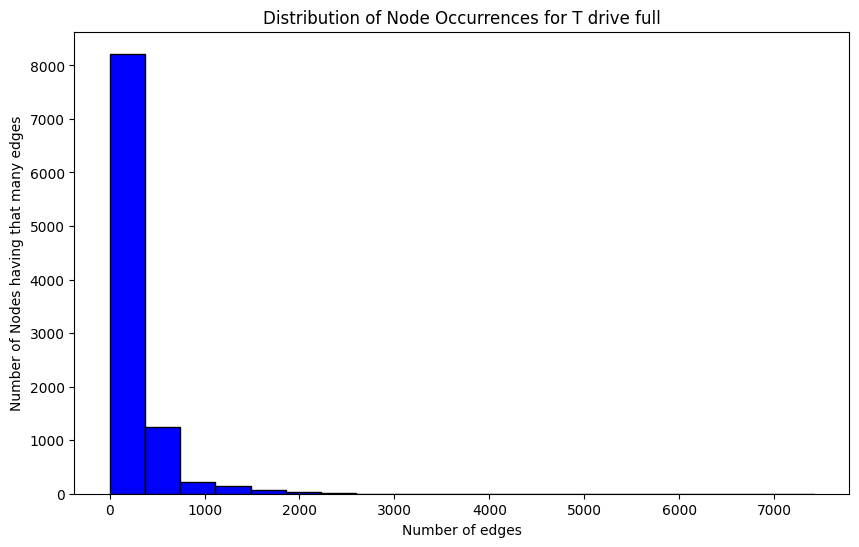

Number of edges: 88132
Number of nodes: 10357
Number of nodes with edges: 9667
Max number of edges from a node: Node 3015 with 1785 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 17.02
Average number of edges per active node: 18.23


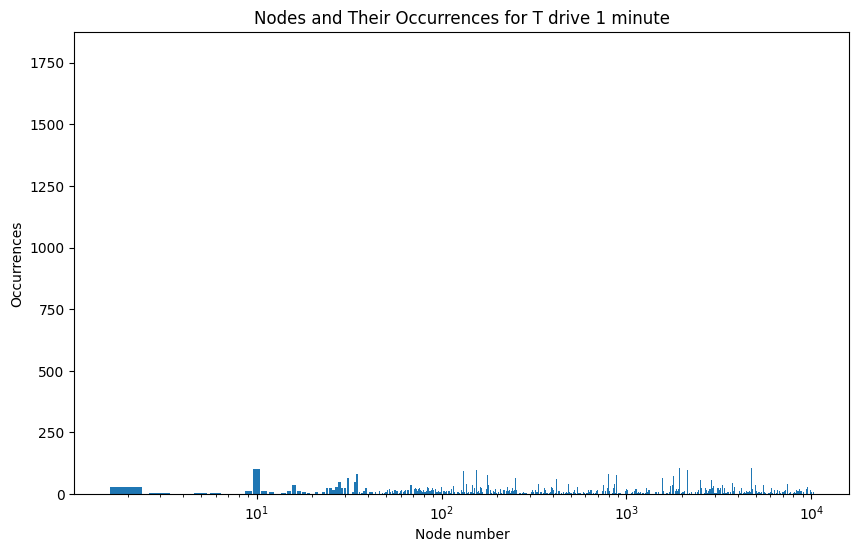

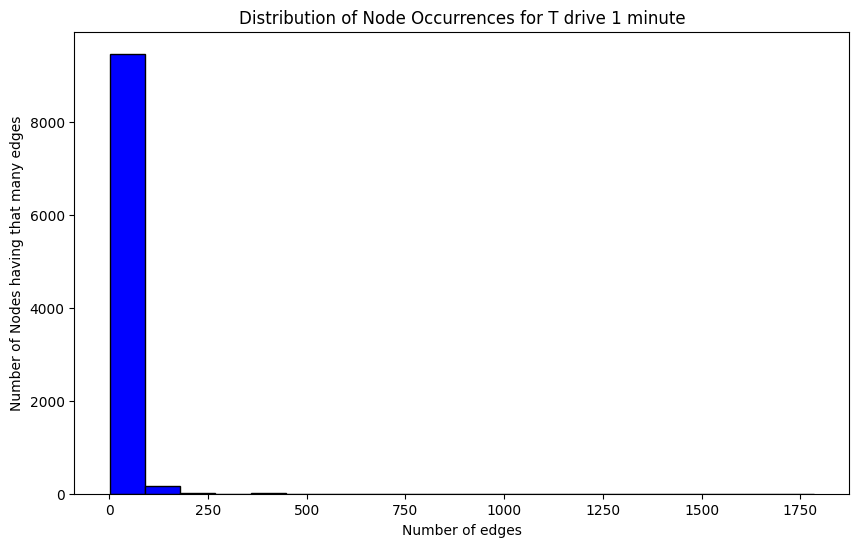

Number of edges: 131415
Number of nodes: 10357
Number of nodes with edges: 9780
Max number of edges from a node: Node 3015 with 1991 edges
Min number of edges from a node: Node 8 with 0 edges
Average number of edges per node: 25.38
Average number of edges per active node: 26.87


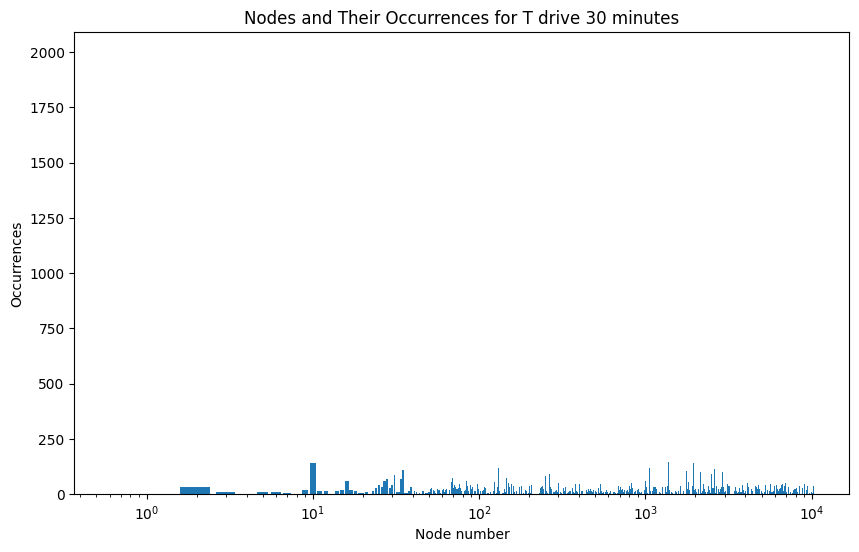

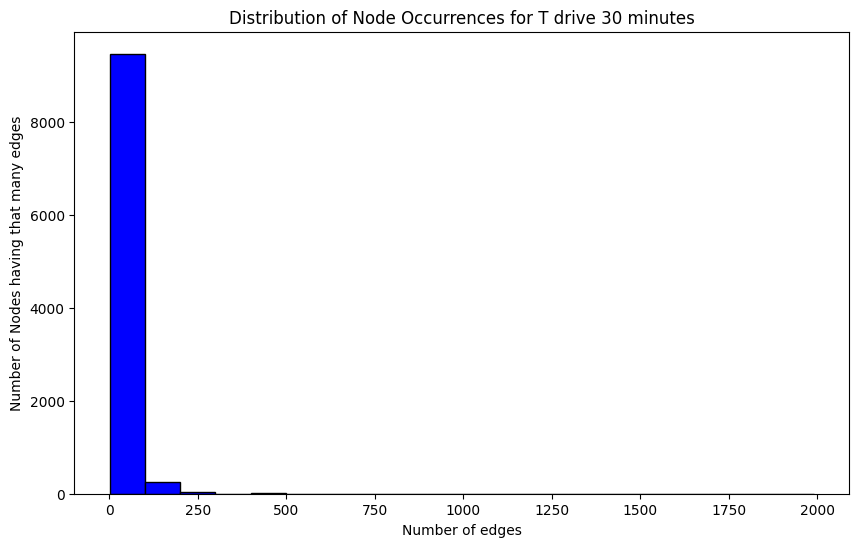

Number of edges: 585572
Number of nodes: 10357
Number of nodes with edges: 9912
Max number of edges from a node: Node 6275 with 4862 edges
Min number of edges from a node: Node 8 with 0 edges
Average number of edges per node: 113.08
Average number of edges per active node: 118.15


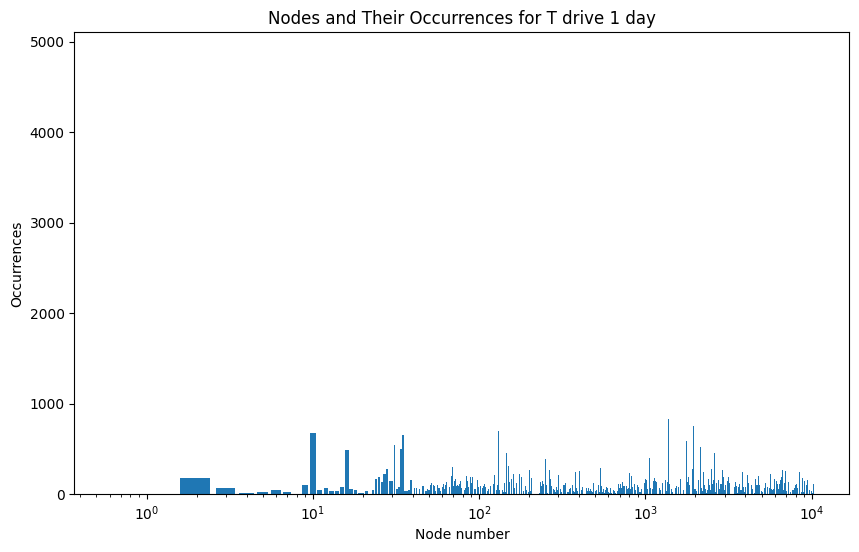

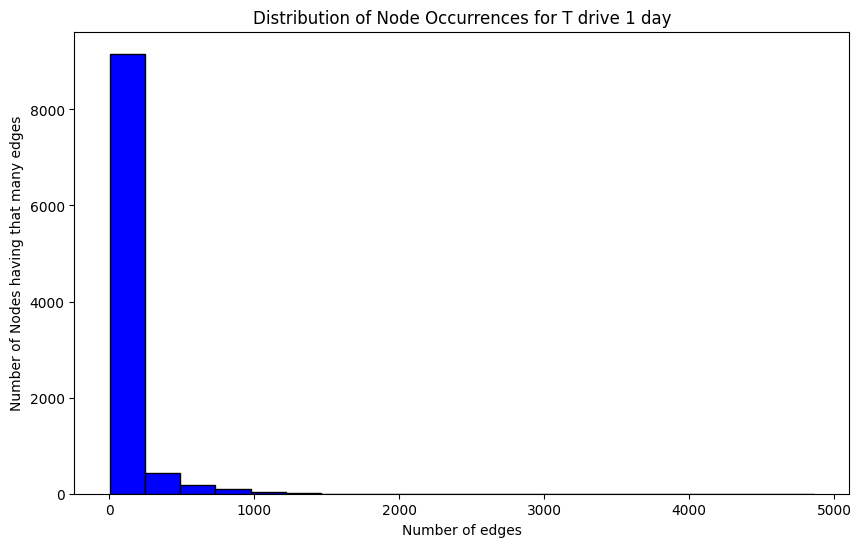

In [4]:
analyze(data1, data1_nodes, max_node_number1, "Person1", "Person2", "Person ID", "Geolife full")
analyze(data2, data1_nodes, max_node_number1, "Person1", "Person2", "Person ID", "Geolife 1 minute")
analyze(data3, data1_nodes, max_node_number1, "Person1", "Person2", "Person ID", "Geolife 30 minutes")
analyze(data4, data1_nodes, max_node_number1, "Person1", "Person2", "Person ID", "Geolife 1 day")
analyze(data5, data5_nodes, max_node_number2, "Taxi1", "Taxi2", "Taxi ID", "T drive full")
analyze(data6, data5_nodes, max_node_number2, "Taxi1", "Taxi2", "Taxi ID", "T drive 1 minute")
analyze(data7, data5_nodes, max_node_number2, "Taxi1", "Taxi2", "Taxi ID", "T drive 30 minutes")
analyze(data8, data5_nodes, max_node_number2, "Taxi1", "Taxi2", "Taxi ID", "T drive 1 day")